# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
count_ride_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
count_ride_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
sum_driver_by_type = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_driver_by_type


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares_per_ride = sum_fares_by_type / count_ride_by_type
avg_fares_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fares_per_driver = sum_fares_by_type / sum_driver_by_type
avg_fares_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total Rides" : count_ride_by_type, 
               "Total Total Drivers" : sum_driver_by_type, 
               "Total Fares" : sum_fares_by_type, 
               "Average Fare per Ride" : avg_fares_per_ride,
               "Average Fare per Driver" : avg_fares_per_driver
               })

In [9]:
pyber_summary_df

,Total Rides,Total Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [11]:
#  8. Format the columns.
pyber_summary_df.style.format({"Total Rides": "{:,}",
                              "Total Total Drivers": "{:,}",
                              "Total Fares": "${:,.2f}",
                              "Average Fare per Ride": "${:.2f}",
                              "Average Fare per Driver": "${:.2f}"}) 

,Total Rides,Total Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 9. Using groupby() on the pyber_data_df to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#  3. Get the total amount of fares for each city type
df = pd.DataFrame(pyber_data_df.groupby(["type", "date"]).sum()["fare"])
df

fare
type  date                   
Rural 2019-01-01 9:45   43.69
      2019-01-02 11:18  52.12
      2019-01-03 19:51  19.90
      2019-01-04 3:31   24.88
      2019-01-06 7:38   47.33
...                       ...
Urban 2019-05-08 1:54   32.69
      2019-05-08 2:31   41.33
      2019-05-08 4:20   21.99
      2019-05-08 4:39   18.45
      2019-05-08 7:29   18.55

[2364 rows x 1 columns]

In [13]:
# 10. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()


In [14]:
# 11. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
df_pivot = df.pivot(index = "date", columns = "type", values = "fare")
df_pivot.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
2019-01-01 14:52,NaN,31.15,NaN
2019-01-01 17:22,NaN,NaN,42.11
2019-01-01 21:04,NaN,NaN,11.71
2019-01-01 2:07,NaN,24.07,NaN


In [15]:
# 12. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2018-01-01':'2018-04-29'.

df = df_pivot.loc['2019-01-01':'2019-04-28']
df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31


In [16]:
# 13. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
df.index = pd.to_datetime(df.index)

In [17]:
# 14. Check that the datatype for the index is datetime using df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2163 entries, 2019-01-01 00:08:00 to 2019-04-27 08:48:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  564 non-null    float64
 2   Urban     1488 non-null   float64
dtypes: float64(3)
memory usage: 67.6 KB


In [18]:
# 15. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df = df.resample("W").sum()
df.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


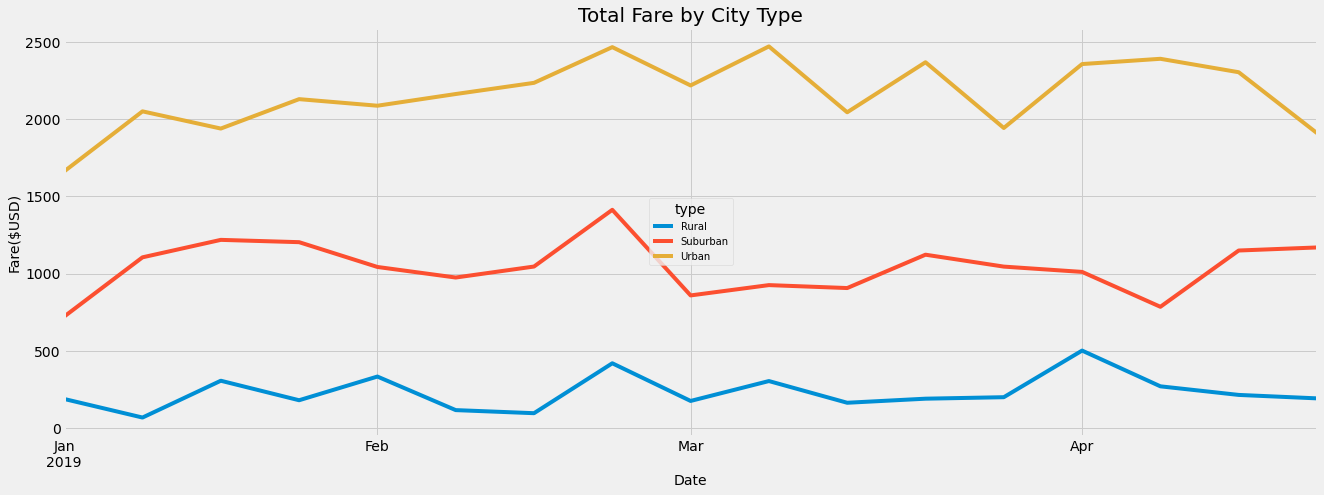

In [19]:
# 16. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

#Plotting each category
ax = df.plot(figsize=(20,7))

#Set axis 
ax.set_title("Total Fare by City Type", fontsize = "20")
ax.set_ylabel("Fare($USD)", fontsize = "14")
ax.set_xlabel("Date", fontsize = "14")
ax.grid(True)


ax.legend(["Rural","Suburban", "Urban"], title="type", loc="center", fontsize="10", mode="Expanded")

plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()

